In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('final_merged_DL.csv')


In [3]:
df.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'that': 0.2117178295838464, 'game': 0.4331049...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'you': 0.17934545532404167, 'do': 0.146177028...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.2851264325068868, 'was': 0.262869...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.11235461457751392, 'the': 0.098552...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [4]:
df.columns
df.info()
df.describe()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81604 entries, 0 to 81603
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentence          81603 non-null  object 
 1   emotion           81604 non-null  object 
 2   dataset_source    81604 non-null  object 
 3   Sentiment_Score   81604 non-null  float64
 4   POS_Tags          81604 non-null  object 
 5   TF_IDF            81604 non-null  object 
 6   GloVe_Embeddings  81604 non-null  object 
 7   PERSON            26954 non-null  object 
 8   ORG               8355 non-null   object 
 9   GPE               4924 non-null   object 
 10  LOC               443 non-null    object 
 11  NORP              1280 non-null   object 
 12  Num_PERSON        81603 non-null  float64
 13  Num_ORG           81603 non-null  float64
 14  Num_GPE           81603 non-null  float64
 15  Num_LOC           81603 non-null  float64
 16  Num_NORP          81603 non-null  float6

,Sentiment_Score,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
count,81604.000000,81603.000000,81603.000000,81603.000000,81603.000000,81603.000000,81604.000000,81604.000000,81604.000000,81604.000000,81604.000000
mean,0.115440,0.409642,0.113574,0.068576,0.005564,0.016789,0.330315,0.102421,0.060340,0.005429,0.015686
std,0.466222,0.665443,0.355681,0.290834,0.076333,0.137063,0.470329,0.303204,0.238117,0.073480,0.124256
min,-0.982900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.205700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.502300,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.985600,9.000000,8.000000,6.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
# Load the dataset
df = pd.read_csv('final_merged_DL.csv')

# Display the first few rows
df.head()

,sentence,emotion,dataset_source,Sentiment_Score,POS_Tags,TF_IDF,GloVe_Embeddings,PERSON,ORG,GPE,...,Num_PERSON,Num_ORG,Num_GPE,Num_LOC,Num_NORP,Has_PERSON,Has_ORG,Has_GPE,Has_LOC,Has_NORP
0,That game hurt.,sadness,GoEmotions,-0.5267,DET NOUN VERB PUNCT,"{'that': 0.2117178295838464, 'game': 0.4331049...","[0.111194666666667, 0.135607333333333, -0.1884...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,"You do right, if you don't care then fuck 'em!",neutral,GoEmotions,0.1316,PRON AUX ADV PUNCT SCONJ PRON AUX PART VERB AD...,"{'you': 0.17934545532404167, 'do': 0.146177028...","[-0.060132625000000, 0.015059875000000, -0.370...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,Man I love reddit.,happiness,GoEmotions,0.6369,INTJ PRON VERB PROPN PUNCT,"{'man': 0.30802558559831167, 'love': 0.2604358...","[0.051240000000000, 0.382370000000000, -0.2492...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,"Etenia was nowhere near them, he was by the Fa...",neutral,GoEmotions,0.0000,PROPN AUX ADV ADP PRON PUNCT PRON AUX ADP DET ...,"{'etenia': 0.2851264325068868, 'was': 0.262869...","[0.032060428571429, 0.113800000000000, -0.1042...",NaN,Falcon,Etenia,...,0.0,1.0,1.0,0.0,0.0,0,1,1,0,0
4,Right? Considering it's such an important docu...,happiness,GoEmotions,0.6239,INTJ PUNCT VERB PRON AUX DET DET ADJ NOUN PUNC...,"{'right': 0.11235461457751392, 'the': 0.098552...","[0.001577235294118, 0.045637117647059, -0.2592...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


Number of NaN values in 'sentence' column: 1

Emotion distribution:
emotion
neutral      28223
happiness    27292
anger         9981
sadness       8448
surprise      4566
disgust       1750
fear          1344
Name: count, dtype: int64


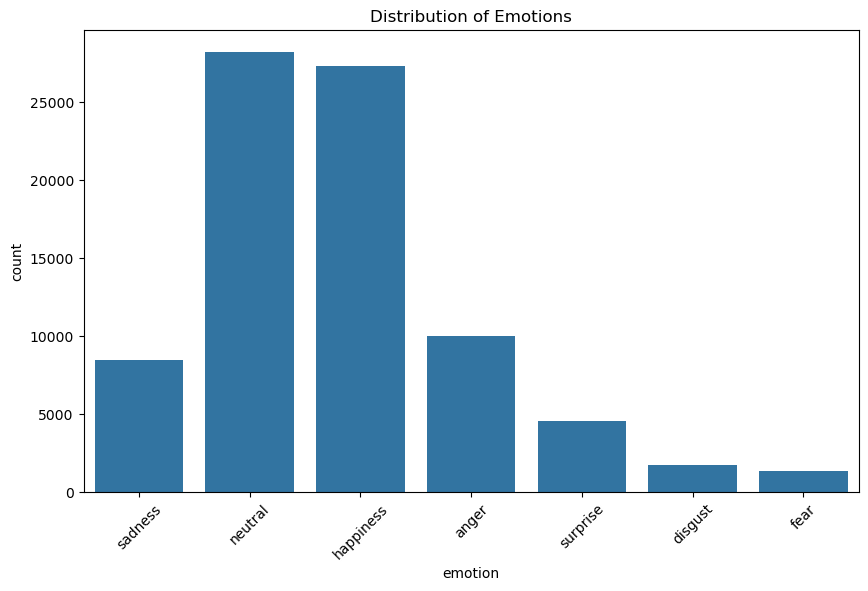

In [7]:
# Check for NaN values in the sentence column
print(f"Number of NaN values in 'sentence' column: {df['sentence'].isna().sum()}")

# Convert all sentences to string and handle NaN values
df['sentence'] = df['sentence'].fillna("").astype(str)

# Check the distribution of emotions
print("\nEmotion distribution:")
print(df['emotion'].value_counts())

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Label encode the emotions
# Assuming 'emotion' column contains the emotion labels
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])

# Display the mapping between emotions and their encoded values
emotion_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Emotion Label Encoding:")
for emotion, code in emotion_mapping.items():
    print(f"{emotion}: {code}")

Emotion Label Encoding:
anger: 0
disgust: 1
fear: 2
happiness: 3
neutral: 4
sadness: 5
surprise: 6


In [9]:
# Prepare the data for LSTM model
# Using 'sentence' column for text data (now converted to strings)
X = df['sentence'].values
y = df['emotion_encoded'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tokenize the text
max_features = 20000  # Maximum number of words to keep
max_len = 128  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print(f"Training data shape: {X_train_pad.shape}")
print(f"Testing data shape: {X_test_pad.shape}")

Training data shape: (65283, 128)
Testing data shape: (16321, 128)


In [10]:
# Build the LSTM model
embedding_dim = 300  # Dimension of the embedding layer
num_classes = len(label_encoder.classes_)  # Number of emotion classes (7)

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Define F1 Score metric
def f1_score_metric(y_true, y_pred):
    # Convert probabilities to class predictions
    y_pred_classes = K.cast(K.argmax(y_pred, axis=1), 'int32')
    y_true = K.cast(y_true, 'int32')
    
    # Calculate precision and recall
    true_positives = K.sum(K.cast(K.equal(y_true, y_pred_classes), 'float32'))
    predicted_positives = K.sum(K.ones_like(y_pred_classes, dtype='float32'))
    actual_positives = K.sum(K.ones_like(y_true, dtype='float32'))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (actual_positives + K.epsilon())
    
    # Calculate F1 score
    f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())
    # Return value between 0 and 1 instead of 0 to 100
    return f1_score

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_score_metric])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 300)          6000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 128, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 6,228,359
Trainable params: 6,228,359
Non-trainable params: 0
______________________________________________

In [11]:
# Train the model
early_stopping = EarlyStopping(monitor='f1_score_metric', mode='max', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
919/919 [==============================] - 530s 573ms/step - loss: 1.5439 - accuracy: 0.3414 - f1_score_metric: 21.7838 - val_loss: 1.5333 - val_accuracy: 0.3394 - val_f1_score_metric: 21.5146
Epoch 2/15
919/919 [==============================] - 520s 566ms/step - loss: 1.5396 - accuracy: 0.3421 - f1_score_metric: 21.8613 - val_loss: 1.5364 - val_accuracy: 0.3452 - val_f1_score_metric: 21.8835
Epoch 3/15
919/919 [==============================] - 522s 568ms/step - loss: 1.5393 - accuracy: 0.3423 - f1_score_metric: 21.8814 - val_loss: 1.5329 - val_accuracy: 0.3394 - val_f1_score_metric: 21.5146
Epoch 4/15
919/919 [==============================] - 516s 562ms/step - loss: 1.5389 - accuracy: 0.3398 - f1_score_metric: 21.7272 - val_loss: 1.5337 - val_accuracy: 0.3452 - val_f1_score_metric: 21.8835
Epoch 5/15
919/919 [==============================] - 522s 568ms/step - loss: 1.5388 - accuracy: 0.3418 - f1_score_metric: 21.8524 - val_loss: 1.5338 - val_accuracy: 0.3452 - val_f1_sc